In [2]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
import seaborn as sns

%matplotlib inline

Using TensorFlow backend.


In [3]:
import quandl
data = quandl.get("EOD/MCD", authtoken="izoTyaHJR5SoE7Zy9yVx")

#data = quandl.get('BCHARTS/KRAKENUSD', returns='pandas')

In [4]:
data.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
1970-01-02,43.00,44.25,43.0,44.25,23256.0,0.0,1.0,0.197684,0.203430,0.197684,0.203430,2825604.0
1970-01-05,44.25,45.00,44.0,45.00,18193.0,0.0,1.0,0.203430,0.206878,0.202281,0.206878,2210449.5
1970-01-06,45.00,45.75,45.0,45.25,16059.0,0.0,1.0,0.206878,0.210326,0.206878,0.208028,1951168.5
1970-01-07,45.25,45.75,45.0,45.00,22459.0,0.0,1.0,0.208028,0.210326,0.206878,0.206878,2728768.5
1970-01-08,45.00,45.38,45.0,45.00,18456.0,0.0,1.0,0.206878,0.208625,0.206878,0.206878,2242404.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12313 entries, 1970-01-02 to 2018-10-19
Data columns (total 12 columns):
Open          12313 non-null float64
High          12313 non-null float64
Low           12313 non-null float64
Close         12313 non-null float64
Volume        12313 non-null float64
Dividend      12313 non-null float64
Split         12313 non-null float64
Adj_Open      12313 non-null float64
Adj_High      12313 non-null float64
Adj_Low       12313 non-null float64
Adj_Close     12313 non-null float64
Adj_Volume    12313 non-null float64
dtypes: float64(12)
memory usage: 1.2 MB


In [6]:
data.tail()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2018-10-15,164.69,165.4700,163.640,163.67,4265932.0,0.0,1.0,164.69,165.4700,163.640,163.67,4265932.0
2018-10-16,163.44,164.4600,162.900,164.07,4094222.0,0.0,1.0,163.44,164.4600,162.900,164.07,4094222.0
2018-10-17,164.47,167.7300,164.110,166.77,3608363.0,0.0,1.0,164.47,167.7300,164.110,166.77,3608363.0
2018-10-18,166.64,167.9938,165.766,166.81,3376605.0,0.0,1.0,166.64,167.9938,165.766,166.81,3376605.0
2018-10-19,166.39,168.1500,166.300,167.49,3465693.0,0.0,1.0,166.39,168.1500,166.300,167.49,3465693.0


In [10]:
data['Weighted Price'] = (data['Open'] + data['Close'])/2

In [11]:
data.tail()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,Weighted Price
Date,,,,,,,,,,,,,
2018-10-15,164.69,165.4700,163.640,163.67,4265932.0,0.0,1.0,164.69,165.4700,163.640,163.67,4265932.0,164.180
2018-10-16,163.44,164.4600,162.900,164.07,4094222.0,0.0,1.0,163.44,164.4600,162.900,164.07,4094222.0,163.755
2018-10-17,164.47,167.7300,164.110,166.77,3608363.0,0.0,1.0,164.47,167.7300,164.110,166.77,3608363.0,165.620
2018-10-18,166.64,167.9938,165.766,166.81,3376605.0,0.0,1.0,166.64,167.9938,165.766,166.81,3376605.0,166.725
2018-10-19,166.39,168.1500,166.300,167.49,3465693.0,0.0,1.0,166.39,168.1500,166.300,167.49,3465693.0,166.940


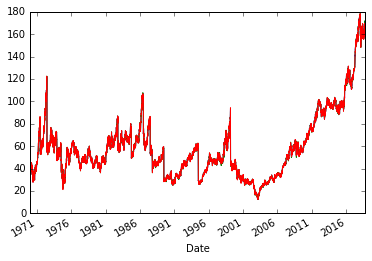

In [12]:
data['Weighted Price'].plot(label = 'Weighted')
data['Open'].plot(label = 'Open')
data['Close'].plot(label = 'Close')

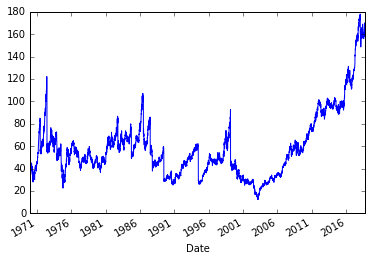

In [13]:
data['Weighted Price'].plot(label = 'Weighted')

In [14]:
data['Weighted Price'].replace(0, np.nan, inplace=True)
data['Weighted Price'].fillna(method='ffill', inplace=True)

In [15]:
data.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,Weighted Price
Date,,,,,,,,,,,,,
1970-01-02,43.00,44.25,43.0,44.25,23256.0,0.0,1.0,0.197684,0.203430,0.197684,0.203430,2825604.0,43.625
1970-01-05,44.25,45.00,44.0,45.00,18193.0,0.0,1.0,0.203430,0.206878,0.202281,0.206878,2210449.5,44.625
1970-01-06,45.00,45.75,45.0,45.25,16059.0,0.0,1.0,0.206878,0.210326,0.206878,0.208028,1951168.5,45.125
1970-01-07,45.25,45.75,45.0,45.00,22459.0,0.0,1.0,0.208028,0.210326,0.206878,0.206878,2728768.5,45.125
1970-01-08,45.00,45.38,45.0,45.00,18456.0,0.0,1.0,0.206878,0.208625,0.206878,0.206878,2242404.0,45.000


In [16]:
from sklearn.preprocessing import MinMaxScaler
values = data['Weighted Price'].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [17]:
train_size = int(len(scaled) * 0.7)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))

8619 3694


In [18]:
train

array([[0.1884434 ],
       [0.19448133],
       [0.1975003 ],
       ...,
       [0.08742905],
       [0.08821398],
       [0.08933099]], dtype=float32)

In [19]:
train.shape
len(train)
train[1:2,0]

array([0.19448133], dtype=float32)

In [20]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [21]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

8618
3693


In [22]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [23]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

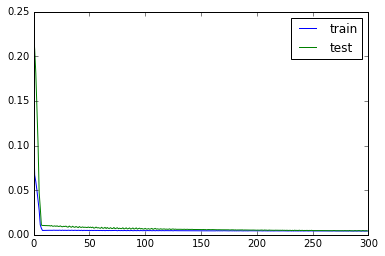

In [24]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

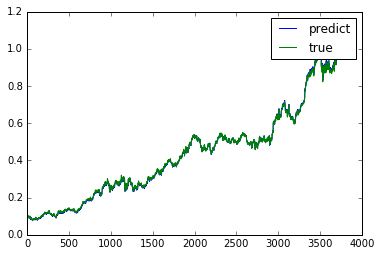

In [25]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

In [26]:
yhat_inverse = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

In [27]:
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.989


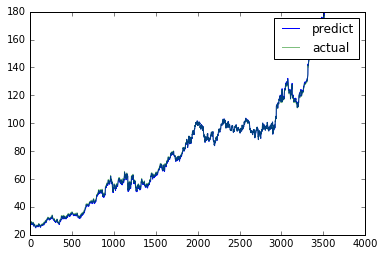

In [28]:
pyplot.plot(yhat_inverse, label='predict')
pyplot.plot(testY_inverse, label='actual', alpha=0.5)
pyplot.legend()
pyplot.show()

In [29]:
predictDates = data.tail(len(testX)).index

In [30]:
testY_reshape = testY_inverse.reshape(len(testY_inverse))
yhat_reshape = yhat_inverse.reshape(len(yhat_inverse))

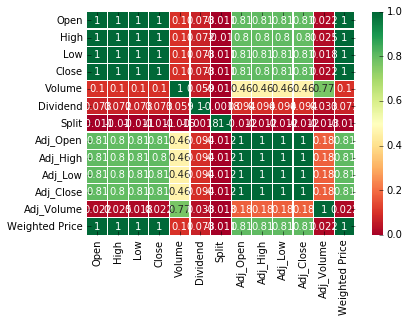

In [31]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)

In [32]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [33]:
values = data[['Weighted Price'] + ['Volume']].values
values = values.astype('float32')

In [34]:
values

array([[4.362500e+01, 2.325600e+04],
       [4.462500e+01, 1.819300e+04],
       [4.512500e+01, 1.605900e+04],
       ...,
       [1.656200e+02, 3.608363e+06],
       [1.667250e+02, 3.376605e+06],
       [1.669400e+02, 3.465693e+06]], dtype=float32)

In [35]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [36]:
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

,var1(t-1),var2(t-1),var1(t),var2(t)
1,0.188443,0.000253,0.194481,0.000194
2,0.194481,0.000194,0.197500,0.000170
3,0.197500,0.000170,0.197500,0.000243
4,0.197500,0.000243,0.196746,0.000197
5,0.196746,0.000197,0.192972,0.000296


In [37]:
reframed.drop(reframed.columns[[3]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)   var1(t)
1   0.188443   0.000253  0.194481
2   0.194481   0.000194  0.197500
3   0.197500   0.000170  0.197500
4   0.197500   0.000243  0.196746
5   0.196746   0.000197  0.192972


In [38]:
values = reframed.values
n_train_hours = int(len(values) * 0.7)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8618, 1, 2) (8618,) (3694, 1, 2) (3694,)


In [39]:
multi_model = Sequential()
multi_model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
multi_model.add(Dense(1))
multi_model.compile(loss='mae', optimizer='adam')
multi_history = multi_model.fit(train_X, train_y, epochs=300, batch_size=100, validation_data=(test_X, test_y), verbose=0, shuffle=False)

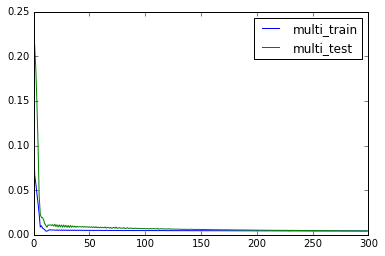

In [40]:
pyplot.plot(multi_history.history['loss'], label='multi_train')
pyplot.plot(multi_history.history['val_loss'], label='multi_test')
pyplot.legend()
pyplot.show()

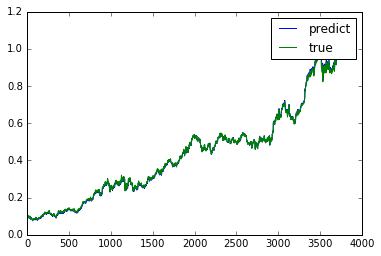

In [41]:
yhat = multi_model.predict(test_X)
pyplot.plot(yhat, label='predict')
pyplot.plot(test_y, label='true')
pyplot.legend()
pyplot.show()

In [42]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [43]:
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.976


In [44]:
actual_chart = go.Scatter(x=predictDates, y=inv_y, name= 'Actual Price')
multi_predict_chart = go.Scatter(x=predictDates, y=inv_yhat, name= 'Multi Predict Price')
predict_chart = go.Scatter(x=predictDates, y=yhat_reshape, name= 'Predict Price')

In [52]:
import matplotlib.pyplot as pltt

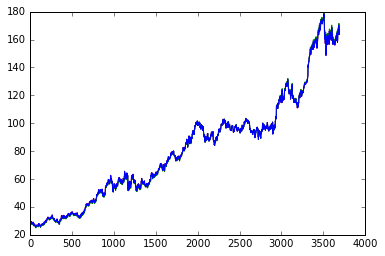

In [53]:
pltt.plot(inv_y, 'r', label = 'Actual' )
pltt.plot(inv_yhat, 'g', label = 'Multi' )
pltt.plot(inv_y, 'b', label = 'Mono' )

In [54]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [ ]:
plotly.tools.set_credentials_file(username='', api_key='')

In [ ]:
actual_chart = go.Scatter(x=predictDates, y=inv_y, name= 'Actual Price')
multi_predict_chart = go.Scatter(x=predictDates, y=inv_yhat, name= 'Multi Predict Price')
predict_chart = go.Scatter(x=predictDates, y=yhat_reshape, name= 'Predict Price')
py.iplot([predict_chart, multi_predict_chart, actual_chart])